In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import heapq as heap
import random

In [2]:
class nodes:

    def __init__(self,priority,value) :
        self.priority = priority
        self.value = value
        self.childe = []

    def degree(self):
        return len(self.childe)
    
    def __repr__(self) -> str:
        return f'Priority: {self.priority}, value: {self.value}'

In [3]:
file = '/home/mefathim/Documents/Python/maze.png'
file1 ='/home/mefathim/Documents/Python/maze2.jpg'

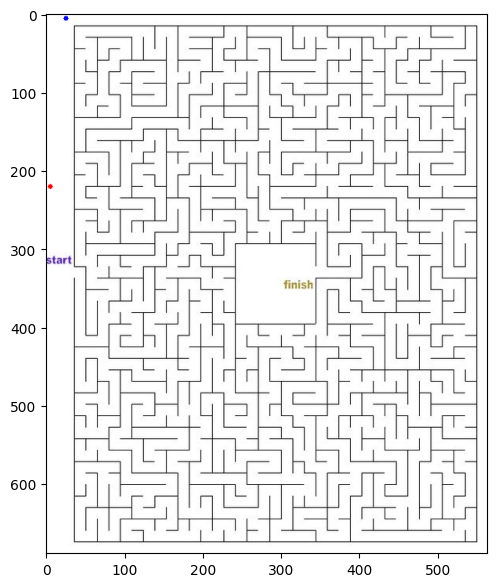

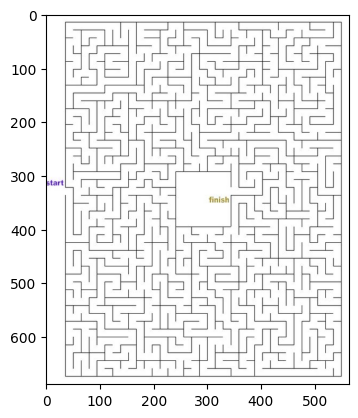

In [4]:

img = cv2.imread(file1) # read an image from a file using
cv2.circle(img,(5,220), 3, (255,0,0), -1) # add a circle at (5, 220)
cv2.circle(img, (25,5), 3, (0,0,255), -1) # add a circle at (25,5)
plt.figure(figsize=(7,7))
plt.imshow(img) # show the image
plt.show()
img = cv2.imread(file1)
# cv2.circle(img,(5,220), 1, (255,0,0), -1) # add a circle at (5, 220)
# cv2.circle(img, (25,5), 3, (0,0,255), -1) # add a circle at (25,5)
# plt.figure(figsize=(7,7))
# plt.imshow(img) # show the image
# plt.show()

plt.imshow(img) # show the image
plt.show()

In [5]:
img.shape

(689, 564, 3)

In [9]:
def distans(i0,i1,j0,j1):
    a=((i0-i1)**2+(j0-j1)**2)**0.5
    return a

def is_valid(i,j):
    if 0<=i<225 and 0<=j<225:
        return True

def is_valid1(i,j):
    if 0<=i<689 and 0<=j<564:
        return True
 
def file():
    matrix_helper = [[[float('inf'),None,False]for i in range(226)]for j in range (226)]
    matrix_helper[5][25][0] = 0
    insert = [0,5,25]
    heap_ = []
    heap.heappush(heap_,insert)
    pop = heap.heappop(heap_)
    print(pop)
    matrix_helper[pop[1]][pop[2]][2] = True
    while pop[1:3]!=[220,5]:
        
        for i in range(pop[1]-1,pop[1]+2):
            for j in range(pop[2]-1,pop[2]+2):
                if is_valid(i,j) and not matrix_helper[i][j][2] and img[i][j][0]>200:
                    coust=matrix_helper[pop[1]][pop[2]][0]+distans(i,pop[1],j,pop[2])
                    if matrix_helper[i][j][0]>coust:
                        matrix_helper[i][j][0]=coust
                        matrix_helper[i][j][1]=(pop[1],pop[2])
                        insert=[coust,i,j]
                        heap.heappush(heap_,insert)
        pop=heap.heappop(heap_)
        

    path=[]
    i =pop[1:3]

    while i !=None:
        path.append(tuple(i))
        i=matrix_helper[i[0]][i[1]][1]
    return path    

def file1():
    matrix_helper=[[[float('inf'),None,False]for i in range(565)]for j in range (690)]
    matrix_helper[325][25][0]=0
    insert=[0,325,25]
    heap_=[]
    heap.heappush(heap_,insert)
    pop=heap.heappop(heap_)
    print(pop)
    matrix_helper[pop[1]][pop[2]][2]=True
    while pop[1:3]!=[325,325]:
        
        for i in range(pop[1]-1,pop[1]+2):
            for j in range(pop[2]-1,pop[2]+2):
                if is_valid1(i,j) and not matrix_helper[i][j][2] and img[i][j][0]>200:
                    coust=matrix_helper[pop[1]][pop[2]][0]+distans(i,pop[1],j,pop[2])
                    if matrix_helper[i][j][0]>coust:
                        matrix_helper[i][j][0]=coust
                        matrix_helper[i][j][1]=(pop[1],pop[2])
                        insert=[coust,i,j]
                        heap.heappush(heap_,insert)
        pop=heap.heappop(heap_)
        

    path=[]
    i =pop[1:3]

    while i !=None:
        path.append(tuple(i))
        i=matrix_helper[i[0]][i[1]][1]
    return path    

# path=file()
path=file1()
                

[0, 5, 25]


In [10]:
def drawPath(img,path, thickness=1):
    '''path is a list of (x,y) tuples'''
    x0,y0=path[0]
    for vertex in path[1:]:
        x1,y1=vertex
        cv2.line(img,(y0,x0),(y1,x1),(255,0,0),thickness)
        x0,y0=vertex

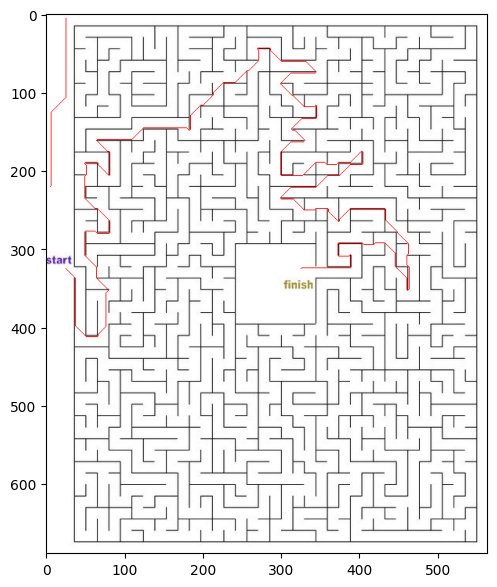

In [11]:
drawPath(img,path)
plt.figure(figsize=(7,7))
plt.imshow(img) # show the image on the screen 
plt.show()